In [1]:
from combined_player import player_minutes_value
from html_scraper import db
from mongo_to_db import create_master_df

In [2]:
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', 50)

# Dataframe of Players

In [4]:
games = db.games.find()
players = db.players.find()

In [5]:
final_df = player_minutes_value(games, players)

In [6]:
final_df.head()

,player_id,player_name,club,birthday,age,foot,squad_num,height,total_minutes_played,transfer_value(sterlings),transfer_value(USD)
0,19132.0,Alexander Domínguez,Squad Club Atlético Vélez Sarsfield,"Jun 5, 1987 (31)",31,right,22.0,"1,95 m",1080.000000,£1.58m,2.01
1,27987.0,Lucas Hoyos,Squad Club Atlético Vélez Sarsfield,"Apr 29, 1989 (29)",29,right,12.0,"1,83 m",90.000000,£135k,0.17
2,30896.0,Gastón Díaz,Squad Club Atlético Vélez Sarsfield,"Mar 13, 1988 (30)",30,right,24.0,"1,75 m",896.483333,£450k,0.57
3,94225.0,Joaquín Laso,Squad Club Atlético Vélez Sarsfield,"Jul 4, 1990 (28)",28,right,6.0,"1,85 m",990.000000,£270k,0.34
4,99779.0,Luis Abram,Squad Club Atlético Vélez Sarsfield,"Feb 27, 1996 (22)",22,left,29.0,"1,80 m",1080.000000,£405k,0.51


# Dataframe of Shots

In [7]:
games = db.games.find()
shots_df = create_master_df(games)

/Users/david/galvanize/super_liga_xg/mongo_to_db.py:69: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  final_df = pd.concat([attach_to_df, df], axis=0, ignore_index=True)
/Users/david/galvanize/super_liga_xg/dataframe_cleaner.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_df['is_goal'] = input_df.loc[:, 'shot_type'].isin([9, 11, 12, 13]).astype(int)


In [20]:
shots_df.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
0,448548,99779.0,6.67,0.00,1.51,-1.21,-1,0.83,22336297,11,20,1.033333,177285.0,0.89,12.44,29.36,-4.84,-1.0,-1.0,1.0,6.838786,12.755990,1,0,1.0
1,448548,60730.0,21.33,12.00,4.24,-0.91,-1,0.73,22336386,35,20,9.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,21.747333,11.242763,0,0,0.0
2,448548,177285.0,12.00,1.78,0.00,-3.03,-1,0.21,22336583,13,20,26.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.000000,0.000000,0,1,1.0
3,448548,185745.0,8.44,0.89,14.53,-6.66,-1,-1.00,22336723,33,20,38.883333,177285.0,22.67,6.22,3.93,19.67,-1.0,-1.0,0.0,16.803407,59.849102,1,0,0.0
4,448548,77892.0,22.22,0.44,13.92,-8.48,-1,-1.00,22336739,33,13,40.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26.220122,32.065607,0,0,0.0


# Get Whole Dataframe Ready for Predictions

In [29]:
from model_prep import create_rf_prep, create_xG_df, create_summed_xG_df

In [22]:
model_ready_df = create_rf_prep(shots_df)

In [23]:
model_ready_df.head()

,player_id,shot_distance,shot_angle,assisted_shot,is_penalty_attempt
0,99779.0,6.838786,12.755990,1.0,0.0
1,60730.0,21.747333,11.242763,0.0,0.0
2,177285.0,12.000000,0.000000,0.0,1.0
3,185745.0,16.803407,59.849102,1.0,0.0
4,77892.0,26.220122,32.065607,0.0,0.0


# Grab pickl'd models

In [14]:
import pickle

In [17]:
rf_model = pickle.load(open("rfc.pkl", "rb"))
gb_model = pickle.load(open("gb.pkl", "rb"))
xgb_model = pickle.load(open("xgb.pkl", "rb"))

In [24]:
columns = ['shot_distance', 'shot_angle', 'assisted_shot', 'is_penalty_attempt']

In [25]:
p_random_forest = rf_model.predict_proba(model_ready_df[columns])
p_gradient_boost =  gb_model.predict_proba(model_ready_df[columns])
p_xgboost = xgb_model.predict_proba(model_ready_df[columns])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


In [58]:
p_ensemble = (p_random_forest + p_gradient_boost + p_xgboost) / 3

array([[0.64167905, 0.35832094],
       [0.9258825 , 0.07411751],
       [0.25544291, 0.74455709],
       ...,
       [0.93637081, 0.0636292 ],
       [0.90362276, 0.09637724],
       [0.93865846, 0.06134154]])

In [59]:
rf_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_random_forest)
rf_contributions = create_summed_xG_df(rf_xg)

gb_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_gradient_boost)
gb_contributions = create_summed_xG_df(gb_xg)

xgb_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_xgboost)
xgb_contributions = create_summed_xG_df(xgb_xg)

ensemble_xg = create_xG_df(model_ready_df, shots_df['is_goal'], p_ensemble)
ensemble_contributions = create_summed_xG_df(ensemble_xg)

In [33]:
rf_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,24256.0,5.03,2.32,7.35,12.0
1,488.0,4.86,1.08,5.94,9.0
2,16081.0,4.60,1.37,5.97,7.0
3,101.0,4.37,0.93,5.30,5.0
4,93853.0,3.68,1.99,5.67,2.0


In [34]:
gb_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,24256.0,5.78,2.55,8.33,12.0
1,101.0,4.45,0.94,5.39,5.0
2,488.0,4.43,0.78,5.21,9.0
3,16081.0,3.95,1.16,5.11,7.0
4,17217.0,3.77,0.84,4.61,3.0


In [35]:
xgb_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,24256.0,6.24,2.84,9.08,12.0
1,488.0,5.26,1.27,6.53,9.0
2,16081.0,5.01,1.55,6.56,7.0
3,101.0,4.73,1.17,5.90,5.0
4,93853.0,4.25,2.27,6.52,2.0


In [60]:
ensemble_contributions.head()

,player_id,total_xG,total_xA,total_xG+xA,goals
0,24256.0,5.68,2.57,8.25,12.0
1,488.0,4.85,1.05,5.90,9.0
2,16081.0,4.52,1.36,5.88,7.0
3,101.0,4.52,1.01,5.53,5.0
4,17217.0,3.80,0.97,4.77,3.0


# Merge with final_df (player info)

In [61]:
rf_sl = pd.merge(rf_contributions, final_df, on=['player_id'])
gb_sl = pd.merge(gb_contributions, final_df, on=['player_id'])
xgb_sl = pd.merge(xgb_contributions, final_df, on=['player_id'])
ens_sl = pd.merge(ensemble_contributions, final_df, on=['player_id'])

In [63]:
rf_sl['xG+xA/90'] = rf_sl['total_xG+xA'] / (rf_sl['total_minutes_played'] / 90 )
gb_sl['xG+xA/90'] = gb_sl['total_xG+xA'] / (gb_sl['total_minutes_played'] / 90 )
xgb_sl['xG+xA/90'] = xgb_sl['total_xG+xA'] / (xgb_sl['total_minutes_played'] / 90 )
ens_sl['xG+xA/90'] = ens_sl['total_xG+xA'] / (ens_sl['total_minutes_played'] / 90 )

In [64]:
final_col = ['player_id', 'player_name', 'club', 'birthday', 'age', 'foot', 'squad_num',
       'total_xG', 'total_xA', 'total_xG+xA', 'goals', 'xG+xA/90', 'transfer_value(USD)', 'total_minutes_played']

In [65]:
rf_sl_final = rf_sl[final_col]
gb_sl_final = gb_sl[final_col]
xgb_sl_final = xgb_sl[final_col]
ens_sl_final = ens_sl[final_col]

### final dataframes

In [66]:
rf_sl_final.head()

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,9.0,5.03,2.32,7.35,12.0,0.676403,3.43,977.966667
1,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,15.0,4.86,1.08,5.94,9.0,0.570260,2.01,937.466667
2,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,7.0,4.60,1.37,5.97,7.0,0.648991,1.71,827.900000
3,101.0,Darío Cvitanich,Squad Club Atlético Banfield,"May 16, 1984 (34)",34,right,20.0,4.37,0.93,5.30,5.0,0.492218,1.71,969.083333
4,93853.0,Franco Soldano,Squad Club Atlético Unión (Santa Fe),"Sep 14, 1994 (24)",24,right,27.0,3.68,1.99,5.67,2.0,0.481256,5.71,1060.350000


In [67]:
gb_sl_final.head()

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,9.0,5.78,2.55,8.33,12.0,0.766591,3.43,977.966667
1,101.0,Darío Cvitanich,Squad Club Atlético Banfield,"May 16, 1984 (34)",34,right,20.0,4.45,0.94,5.39,5.0,0.500576,1.71,969.083333
2,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,15.0,4.43,0.78,5.21,9.0,0.500178,2.01,937.466667
3,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,7.0,3.95,1.16,5.11,7.0,0.555502,1.71,827.900000
4,17217.0,Jonatan Cristaldo,Squad Racing Club,"Mar 5, 1989 (29)",29,right,9.0,3.77,0.84,4.61,3.0,0.530303,1.37,782.383333


In [68]:
xgb_sl_final.head()

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,9.0,6.24,2.84,9.08,12.0,0.835611,3.43,977.966667
1,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,15.0,5.26,1.27,6.53,9.0,0.626902,2.01,937.466667
2,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,7.0,5.01,1.55,6.56,7.0,0.713130,1.71,827.900000
3,101.0,Darío Cvitanich,Squad Club Atlético Banfield,"May 16, 1984 (34)",34,right,20.0,4.73,1.17,5.90,5.0,0.547940,1.71,969.083333
4,93853.0,Franco Soldano,Squad Club Atlético Unión (Santa Fe),"Sep 14, 1994 (24)",24,right,27.0,4.25,2.27,6.52,2.0,0.553402,5.71,1060.350000


In [69]:
ens_sl_final.head()

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
0,24256.0,Emmanuel Gigliotti,Squad Club Atlético Independiente,"May 20, 1987 (31)",31,right,9.0,5.68,2.57,8.25,12.0,0.759228,3.43,977.966667
1,488.0,Lisandro López,Squad Racing Club,"Mar 2, 1983 (35)",35,right,15.0,4.85,1.05,5.90,9.0,0.566420,2.01,937.466667
2,16081.0,Luis Rodríguez,Squad Club Atlético Tucumán,"Jan 1, 1985 (33)",33,right,7.0,4.52,1.36,5.88,7.0,0.639208,1.71,827.900000
3,101.0,Darío Cvitanich,Squad Club Atlético Banfield,"May 16, 1984 (34)",34,right,20.0,4.52,1.01,5.53,5.0,0.513578,1.71,969.083333
4,17217.0,Jonatan Cristaldo,Squad Racing Club,"Mar 5, 1989 (29)",29,right,9.0,3.80,0.97,4.77,3.0,0.548708,1.37,782.383333


### players younger than 25, with an xG+xA contribution of over 0.3 per game, who have played at least 300 minutes

In [51]:
# random forest
rf_sl_final[(rf_sl_final['age'] < 25) & (rf_sl_final['xG+xA/90'] > 0.3) & (rf_sl_final['transfer_value(USD)'] < 5) & (rf_sl_final['total_minutes_played'] > 300)]

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
5,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,26.0,3.59,0.32,3.91,2.0,0.386328,1.71,910.883333
15,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,15.0,2.81,1.90,4.71,3.0,0.483169,2.29,877.333333
19,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,7.0,2.47,0.64,3.11,2.0,0.328972,0.17,850.833333
20,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,29.0,2.38,1.40,3.78,3.0,0.451363,3.43,753.716667
29,185745.0,Lucas Robertone,Squad Club Atlético Vélez Sarsfield,"Mar 18, 1997 (21)",21,right,16.0,2.04,0.99,3.03,2.0,0.309359,3.43,881.500000
41,172801.0,Nahuel Bustos,Squad Club Atlético Talleres,"Jul 4, 1998 (20)",20,right,7.0,1.84,0.66,2.50,4.0,0.325670,0.06,690.883333
47,118855.0,Nazareno Solís,Squad Club Atlético San Martín (SJ),"Apr 22, 1994 (24)",24,left,7.0,1.68,0.45,2.13,1.0,0.321079,0.69,597.050000
50,172730.0,Nicolás Leguizamón,Squad Club Atlético Colón,"Jan 26, 1995 (23)",23,right,9.0,1.61,1.16,2.77,0.0,0.593265,1.71,420.216667
53,95766.0,Adrián Balboa,Squad Club Atlético Belgrano,"Jan 19, 1994 (24)",24,right,11.0,1.53,0.95,2.48,1.0,0.368530,0.86,605.650000
56,175369.0,Franco Troyansky,Squad Club Atlético Unión (Santa Fe),"Jun 3, 1997 (21)",21,left,22.0,1.51,1.17,2.68,1.0,0.408410,1.44,590.583333


In [52]:
#gradient boost
gb_sl_final[(gb_sl_final['age'] < 25) & (gb_sl_final['xG+xA/90'] > 0.3) & (gb_sl_final['transfer_value(USD)'] < 5) & (gb_sl_final['total_minutes_played'] > 300)]

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
7,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,26.0,3.20,0.26,3.46,2.0,0.341866,1.71,910.883333
14,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,15.0,2.69,1.83,4.52,3.0,0.463678,2.29,877.333333
15,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,7.0,2.65,0.61,3.26,2.0,0.344838,0.17,850.833333
16,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,29.0,2.53,1.47,4.00,3.0,0.477633,3.43,753.716667
27,163041.0,Alexander Barboza,Squad Club Social y Deportivo Defensa y Justicia,"Mar 16, 1995 (23)",23,left,6.0,2.06,0.99,3.05,1.0,0.321272,2.86,854.416667
30,172801.0,Nahuel Bustos,Squad Club Atlético Talleres,"Jul 4, 1998 (20)",20,right,7.0,1.98,0.67,2.65,4.0,0.345210,0.06,690.883333
38,118855.0,Nazareno Solís,Squad Club Atlético San Martín (SJ),"Apr 22, 1994 (24)",24,left,7.0,1.84,0.41,2.25,1.0,0.339168,0.69,597.050000
40,172730.0,Nicolás Leguizamón,Squad Club Atlético Colón,"Jan 26, 1995 (23)",23,right,9.0,1.73,1.24,2.97,0.0,0.636100,1.71,420.216667
50,95766.0,Adrián Balboa,Squad Club Atlético Belgrano,"Jan 19, 1994 (24)",24,right,11.0,1.60,0.99,2.59,1.0,0.384876,0.86,605.650000
58,175369.0,Franco Troyansky,Squad Club Atlético Unión (Santa Fe),"Jun 3, 1997 (21)",21,left,22.0,1.41,1.08,2.49,1.0,0.379455,1.44,590.583333


In [103]:
#xgboost
yp_xgb = xgb_sl_final[(xgb_sl_final['age'] < 25) & (xgb_sl_final['xG+xA/90'] > 0.3) & (xgb_sl_final['transfer_value(USD)'] < 5) & (xgb_sl_final['total_minutes_played'] > 300)].copy()
xgb_sl_final[(xgb_sl_final['age'] < 25) & (xgb_sl_final['xG+xA/90'] > 0.3) & (xgb_sl_final['transfer_value(USD)'] < 5) & (xgb_sl_final['total_minutes_played'] > 300)]

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
10,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,26.0,3.79,0.36,4.15,2.0,0.410042,1.71,910.883333
14,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,15.0,3.36,2.31,5.67,3.0,0.581649,2.29,877.333333
17,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,29.0,2.95,1.73,4.68,3.0,0.558831,3.43,753.716667
19,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,7.0,2.83,0.73,3.56,2.0,0.376572,0.17,850.833333
24,121341.0,Héctor Fértoli,Squad Club Atlético Newell's Old Boys,"Dec 3, 1994 (24)",24,right,26.0,2.51,0.87,3.38,3.0,0.355734,0.80,855.133333
27,185745.0,Lucas Robertone,Squad Club Atlético Vélez Sarsfield,"Mar 18, 1997 (21)",21,right,16.0,2.40,1.10,3.50,2.0,0.357345,3.43,881.500000
32,163041.0,Alexander Barboza,Squad Club Social y Deportivo Defensa y Justicia,"Mar 16, 1995 (23)",23,left,6.0,2.30,1.01,3.31,1.0,0.348659,2.86,854.416667
39,172801.0,Nahuel Bustos,Squad Club Atlético Talleres,"Jul 4, 1998 (20)",20,right,7.0,2.18,0.83,3.01,4.0,0.392107,0.06,690.883333
44,118855.0,Nazareno Solís,Squad Club Atlético San Martín (SJ),"Apr 22, 1994 (24)",24,left,7.0,2.07,0.56,2.63,1.0,0.396449,0.69,597.050000
47,95766.0,Adrián Balboa,Squad Club Atlético Belgrano,"Jan 19, 1994 (24)",24,right,11.0,1.99,1.18,3.17,1.0,0.471064,0.86,605.650000


In [71]:
ens_sl_final[(ens_sl_final['age'] < 25) & (ens_sl_final['xG+xA/90'] > 0.3) & (ens_sl_final['transfer_value(USD)'] < 5) & (ens_sl_final['total_minutes_played'] > 300)]

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
7,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,26.0,3.53,0.31,3.84,2.0,0.379412,1.71,910.883333
14,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,15.0,2.95,2.01,4.96,3.0,0.508815,2.29,877.333333
17,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,7.0,2.65,0.66,3.31,2.0,0.350127,0.17,850.833333
18,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,29.0,2.62,1.54,4.16,3.0,0.496738,3.43,753.716667
26,121341.0,Héctor Fértoli,Squad Club Atlético Newell's Old Boys,"Dec 3, 1994 (24)",24,right,26.0,2.14,0.72,2.86,3.0,0.301006,0.80,855.133333
28,185745.0,Lucas Robertone,Squad Club Atlético Vélez Sarsfield,"Mar 18, 1997 (21)",21,right,16.0,2.12,1.00,3.12,2.0,0.318548,3.43,881.500000
30,163041.0,Alexander Barboza,Squad Club Social y Deportivo Defensa y Justicia,"Mar 16, 1995 (23)",23,left,6.0,2.09,0.93,3.02,1.0,0.318112,2.86,854.416667
39,172801.0,Nahuel Bustos,Squad Club Atlético Talleres,"Jul 4, 1998 (20)",20,right,7.0,2.00,0.72,2.72,4.0,0.354329,0.06,690.883333
44,118855.0,Nazareno Solís,Squad Club Atlético San Martín (SJ),"Apr 22, 1994 (24)",24,left,7.0,1.86,0.47,2.33,1.0,0.351227,0.69,597.050000
46,172730.0,Nicolás Leguizamón,Squad Club Atlético Colón,"Jan 26, 1995 (23)",23,right,9.0,1.77,1.28,3.05,0.0,0.653234,1.71,420.216667


### scatter plots of people of interest (price vs xg, age vs xg)

In [117]:
# fig, ax = plt.subplots()
# ax.scatter(yp_xgb['xG+xA/90'], yp_xgb['transfer_value(USD)'])
# ax.set_title('xG+xA/90 vs Transfer Value for Players Younger than 25')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 5])

(0, 1)

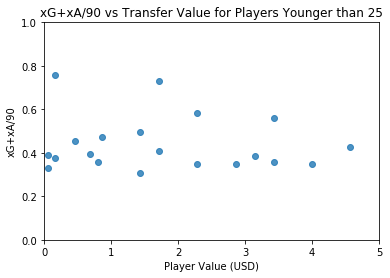

In [118]:
fig, ax = plt.subplots()
ax.scatter(yp_xgb['transfer_value(USD)'], yp_xgb['xG+xA/90'], alpha=0.8)
ax.set_title('xG+xA/90 vs Transfer Value for Players Younger than 25')
ax.set_xlabel('Player Value (USD)')
ax.set_ylabel('xG+xA/90')
ax.set_xlim([0, 5])
ax.set_ylim([0, 1])

# probability by area

In [72]:
from create_shot_coordinates import shot_probability_player, coord_table

In [73]:
six, eighteen, eighteen_plus, left_box, right_box = shot_probability_player()

### prob of scoring with 6-yards

In [76]:
six_yard_shot = coord_table(-10, 10, 2, 2, 6, 2)

p_random_forest6 = rf_model.predict_proba(six)
p_gradient_boost6 =  gb_model.predict_proba(six)
p_xgboost6 = xgb_model.predict_proba(six)

p_6_rf = p_random_forest6.sum(axis=0)[1] / len(p_random_forest6)
p_6_gb = p_gradient_boost6.sum(axis=0)[1] / len(p_gradient_boost6)
p_6_xgb = p_xgboost6.sum(axis=0)[1] / len(p_xgboost6)
p_6_e = (p_6_rf + p_6_gb + p_6_xgb) / 3

print(p_6_rf)
print(p_6_gb)
print(p_6_xgb)
print(p_6_e)

0.3679635583054888
0.398481654643136
0.40284466020988696
0.38976329105283725


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


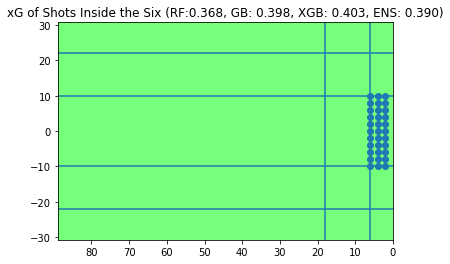

In [77]:
fig, ax = plt.subplots()
ax.scatter(six_yard_shot['shot_coord_x1'], six_yard_shot['shot_coord_y1'])
# ax.scatter(shot_distance_df['pass_coord_x1'], shot_distance_df['pass_coord_y1'], color='red')
# ax.scatter(transposed_df['pass_coord_x2'], transposed_df['pass_coord_y2'], color='yellow')
ax.set_title('xG of Shots Inside the Six (RF:0.368, GB: 0.398, XGB: 0.403, ENS: 0.390)')
ax.set_xlim([88.88, 0])
ax.set_ylim([-30.76, 30.76])
ax.axvline(6)
ax.axvline(18)
ax.axhline(10, xmax=6)
ax.axhline(-10, xmax=6)
ax.axhline(22, xmax=18)
ax.axhline(-22, xmax=18)
ax.set_facecolor('xkcd:lightgreen')

### prob of scoring inside 18

In [80]:
eighteen_yard_shot = coord_table(-10, 10, 2, 8, 18, 2)

p_random_forest18 = rf_model.predict_proba(eighteen)
p_gradient_boost18 =  gb_model.predict_proba(eighteen)
p_xgboost18 = xgb_model.predict_proba(eighteen)

p_18_rf = p_random_forest18.sum(axis=0)[1] / len(p_random_forest18)
p_18_gb = p_gradient_boost18.sum(axis=0)[1] / len(p_gradient_boost18)
p_18_xgb = p_xgboost18.sum(axis=0)[1] / len(p_xgboost18)
p_18_e = (p_18_rf + p_18_gb + p_18_xgb) / 3

print(p_18_rf)
print(p_18_gb)
print(p_18_xgb)
print(p_18_e)

0.11718742891408605
0.12010388945760694
0.14649878126202207
0.12793003321123833


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


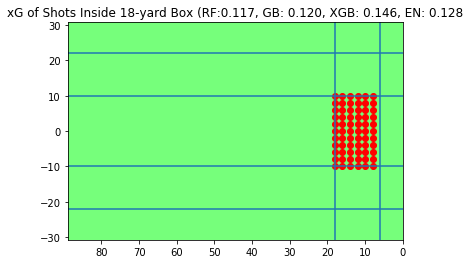

In [85]:
fig, ax = plt.subplots()
ax.scatter(eighteen_yard_shot['shot_coord_x1'], eighteen_yard_shot['shot_coord_y1'], color='red')
# ax.scatter(shot_distance_df['pass_coord_x1'], shot_distance_df['pass_coord_y1'], color='red')
# ax.scatter(transposed_df['pass_coord_x2'], transposed_df['pass_coord_y2'], color='yellow')
ax.set_title('xG of Shots Inside 18-yard Box (RF:0.117, GB: 0.120, XGB: 0.146, EN: 0.128')
ax.set_xlim([88.88, 0])
ax.set_ylim([-30.76, 30.76])
ax.axvline(6)
ax.axvline(18)
ax.axhline(10, xmax=6)
ax.axhline(-10, xmax=6)
ax.axhline(22, xmax=18)
ax.axhline(-22, xmax=18)
ax.set_facecolor('xkcd:lightgreen')

### prob of scoring outside 18

In [82]:
beyond_eighteen_yard_shot = coord_table(-22, 22, 2, 20, 30, 2)

p_random_forest18p = rf_model.predict_proba(eighteen_plus)
p_gradient_boost18p =  gb_model.predict_proba(eighteen_plus)
p_xgboost18p = xgb_model.predict_proba(eighteen_plus)

p_18p_rf = p_random_forest18p.sum(axis=0)[1] / len(p_random_forest18p)
p_18p_gb = p_gradient_boost18p.sum(axis=0)[1] / len(p_gradient_boost18p)
p_18p_xgb = p_xgboost18p.sum(axis=0)[1] / len(p_xgboost18p)
p_18p_e = (p_18p_rf + p_18p_gb + p_18p_xgb) / 3

print(p_18p_rf)
print(p_18p_gb)
print(p_18p_xgb)
print(p_18p_e)

0.05648514065127861
0.04482416328090801
0.057187861290530884
0.052832388407572504


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


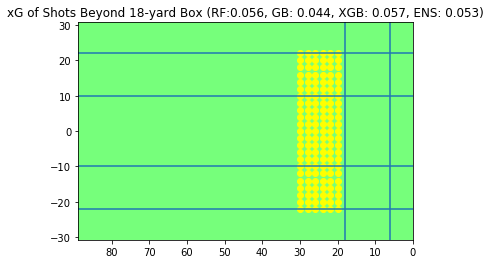

In [86]:
fig, ax = plt.subplots()
ax.scatter(beyond_eighteen_yard_shot['shot_coord_x1'], beyond_eighteen_yard_shot['shot_coord_y1'], color='yellow')
# ax.scatter(shot_distance_df['pass_coord_x1'], shot_distance_df['pass_coord_y1'], color='red')
# ax.scatter(transposed_df['pass_coord_x2'], transposed_df['pass_coord_y2'], color='yellow')
ax.set_title('xG of Shots Beyond 18-yard Box (RF:0.056, GB: 0.044, XGB: 0.057, ENS: 0.053)')
ax.set_xlim([88.88, 0])
ax.set_ylim([-30.76, 30.76])
ax.axvline(6)
ax.axvline(18)
ax.axhline(10, xmax=6)
ax.axhline(-10, xmax=6)
ax.axhline(22, xmax=18)
ax.axhline(-22, xmax=18)
ax.set_facecolor('xkcd:lightgreen')

### prob of scoring inside 18, left of six

In [84]:
left_six_yard_shot = coord_table(12, 22, 2, 3, 18, 3)

p_random_forest6l = rf_model.predict_proba(left_box)
p_gradient_boost6l =  gb_model.predict_proba(left_box)
p_xgboost6l = xgb_model.predict_proba(left_box)

p_6l_rf = p_random_forest6l.sum(axis=0)[1] / len(p_random_forest6l)
p_6l_gb = p_gradient_boost6l.sum(axis=0)[1] / len(p_gradient_boost6l)
p_6l_xgb = p_xgboost6l.sum(axis=0)[1] / len(p_xgboost6l)
p_6l_e = (p_6l_rf + p_6l_gb + p_6l_xgb) / 3

print(p_6l_rf)
print(p_6l_gb)
print(p_6l_xgb)
print(p_6l_e)

0.06491957944716804
0.08951621390170779
0.075130475891961
0.07652208974694562


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


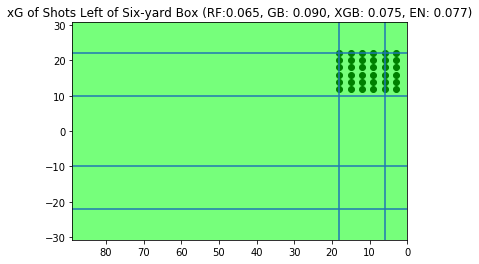

In [87]:
fig, ax = plt.subplots()
ax.scatter(left_six_yard_shot['shot_coord_x1'], left_six_yard_shot['shot_coord_y1'], color='green')
ax.set_title('xG of Shots Left of Six-yard Box (RF:0.065, GB: 0.090, XGB: 0.075, EN: 0.077)')
ax.set_xlim([88.88, 0])
ax.set_ylim([-30.76, 30.76])
ax.axvline(6)
ax.axvline(18)
ax.axhline(10, xmax=6)
ax.axhline(-10, xmax=6)
ax.axhline(22, xmax=18)
ax.axhline(-22, xmax=18)
ax.set_facecolor('xkcd:lightgreen')

In [88]:
right_six_yard_shot = coord_table(-12, -22, -2, 3, 18, 3)

p_random_forest6r = rf_model.predict_proba(right_box)
p_gradient_boost6r =  gb_model.predict_proba(right_box)
p_xgboost6r = xgb_model.predict_proba(right_box)

p_6r_rf = p_random_forest6r.sum(axis=0)[1] / len(p_random_forest6r)
p_6r_gb = p_gradient_boost6r.sum(axis=0)[1] / len(p_gradient_boost6r)
p_6r_xgb = p_xgboost6r.sum(axis=0)[1] / len(p_xgboost6r)
p_6r_e = (p_6r_rf + p_6r_gb + p_6r_xgb) / 3

print(p_6r_rf)
print(p_6r_gb)
print(p_6r_xgb)
print(p_6r_e)

0.07387036915536958
0.08763064818748958
0.08918862210379706
0.08356321314888542


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


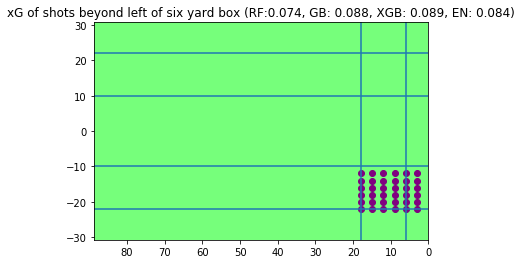

In [89]:
fig, ax = plt.subplots()
ax.scatter(right_six_yard_shot['shot_coord_x1'], right_six_yard_shot['shot_coord_y1'], color='purple')
ax.set_title('xG of shots beyond left of six yard box (RF:0.074, GB: 0.088, XGB: 0.089, EN: 0.084)')
ax.set_xlim([88.88, 0])
ax.set_ylim([-30.76, 30.76])
ax.axvline(6)
ax.axvline(18)
ax.axhline(10, xmax=6)
ax.axhline(-10, xmax=6)
ax.axhline(22, xmax=18)
ax.axhline(-22, xmax=18)
ax.set_facecolor('xkcd:lightgreen')

# Player shot chart

using ensemble table, mapping player shot_charts

In [90]:
#players of interest
ens_sl_final[(ens_sl_final['age'] < 25) & (ens_sl_final['xG+xA/90'] > 0.3) & (ens_sl_final['transfer_value(USD)'] < 5) & (ens_sl_final['total_minutes_played'] > 300)]

,player_id,player_name,club,birthday,age,foot,squad_num,total_xG,total_xA,total_xG+xA,goals,xG+xA/90,transfer_value(USD),total_minutes_played
7,135386.0,Leonardo Sequeira,Squad Club Atlético Belgrano,"Apr 26, 1995 (23)",23,right,26.0,3.53,0.31,3.84,2.0,0.379412,1.71,910.883333
14,172565.0,Nicolás Reniero,Squad Club Atlético San Lorenzo de Almagro,"Mar 18, 1995 (23)",23,right,15.0,2.95,2.01,4.96,3.0,0.508815,2.29,877.333333
17,193188.0,Gastón Togni,Squad Club Social y Deportivo Defensa y Justicia,"Sep 20, 1997 (21)",21,left,7.0,2.65,0.66,3.31,2.0,0.350127,0.17,850.833333
18,114108.0,Nicolás Fernández,Squad Club Social y Deportivo Defensa y Justicia,"Feb 8, 1996 (22)",22,right,29.0,2.62,1.54,4.16,3.0,0.496738,3.43,753.716667
26,121341.0,Héctor Fértoli,Squad Club Atlético Newell's Old Boys,"Dec 3, 1994 (24)",24,right,26.0,2.14,0.72,2.86,3.0,0.301006,0.80,855.133333
28,185745.0,Lucas Robertone,Squad Club Atlético Vélez Sarsfield,"Mar 18, 1997 (21)",21,right,16.0,2.12,1.00,3.12,2.0,0.318548,3.43,881.500000
30,163041.0,Alexander Barboza,Squad Club Social y Deportivo Defensa y Justicia,"Mar 16, 1995 (23)",23,left,6.0,2.09,0.93,3.02,1.0,0.318112,2.86,854.416667
39,172801.0,Nahuel Bustos,Squad Club Atlético Talleres,"Jul 4, 1998 (20)",20,right,7.0,2.00,0.72,2.72,4.0,0.354329,0.06,690.883333
44,118855.0,Nazareno Solís,Squad Club Atlético San Martín (SJ),"Apr 22, 1994 (24)",24,left,7.0,1.86,0.47,2.33,1.0,0.351227,0.69,597.050000
46,172730.0,Nicolás Leguizamón,Squad Club Atlético Colón,"Jan 26, 1995 (23)",23,right,9.0,1.77,1.28,3.05,0.0,0.653234,1.71,420.216667


In [93]:
nah_bustos = shots_df[shots_df['player_id'] == 172801.0 ]

In [97]:
nah_bustos.head()

,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick,shot_distance,shot_angle,assisted_shot,is_penalty_attempt,is_goal
1230,448612,172801.0,10.67,0.44,3.63,3.03,-1,0.08,22939571,9,135,11.700000,104594.0,12.44,12.44,-1.21,-1.21,-1.0,-1.0,0.0,11.270572,18.788622,1,0,1.0
1463,448618,172801.0,4.89,3.56,12.41,3.03,-1,0.32,23079362,9,135,12.183333,70297.0,1.78,5.33,27.24,6.66,-1.0,-1.0,1.0,13.338673,68.493721,1,0,1.0
1470,448618,172801.0,11.56,6.22,3.03,-0.61,-1,0.73,23081429,35,135,56.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.950502,14.687436,0,0,0.0
1474,448618,172801.0,16.00,10.22,-3.03,-15.13,-1,-1.00,23082476,33,135,86.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,16.284376,-10.723401,0,0,0.0
1758,448632,172801.0,17.78,0.89,-3.63,0.61,-1,-1.00,23209935,33,135,23.483333,190843.0,19.11,24.44,-11.80,2.42,-1.0,-1.0,0.0,18.146771,-11.539040,1,0,0.0


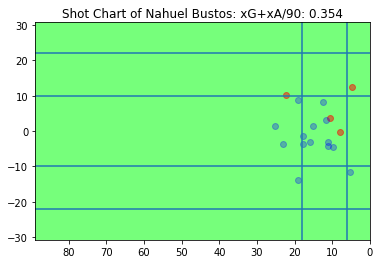

In [121]:
fig, ax = plt.subplots()
ax.scatter(nah_bustos[nah_bustos['is_goal'] == 1.0]['shot_coord_x1'], nah_bustos[nah_bustos['is_goal'] ==1.0]['shot_coord_y1'], color='red', alpha = 0.5)
ax.scatter(nah_bustos[nah_bustos['is_goal'] == 0.0]['shot_coord_x1'], nah_bustos[nah_bustos['is_goal'] == 0.0]['shot_coord_y1'], color='blue', alpha = 0.3)
ax.set_title('Shot Chart of Nahuel Bustos: xG+xA/90: 0.354')
ax.set_xlim([88.88, 0])
ax.set_ylim([-30.76, 30.76])
ax.axvline(6, ymin=-10, ymax=10)
ax.axvline(18)
ax.axhline(10, xmax=6)
ax.axhline(-10, xmax=6)
ax.axhline(22, xmax=18)
ax.axhline(-22, xmax=18)
ax.set_facecolor('xkcd:lightgreen')